In [1]:
import cv2
import numpy as np

import os
import sys

import matplotlib.pyplot as plt
import detector
import face_recognition

In [11]:
# det = detector.Retinaface_Detector()

# image1 = cv2.imread('./../../data/input/images/FaceMatchingTest/arni1.jpg')
# image1 = cv2.resize(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), (480, 640))

# image2 = cv2.imread('./../../data/input/images/FaceMatchingTest/arni2.jpg')
# image2 = cv2.resize(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), (480, 640))

# image3 = cv2.imread('./../../data/input/images/FaceMatchingTest/not_arni.jpg')
# image3 = cv2.resize(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB), (860, 480))

# image4 = cv2.imread('./../../data/input/images/FaceMatchingTest/iam.jpg')
# image4 = cv2.resize(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB), (680, 680))

# def bbox(image):
#     global det
#     bbox = det.detect(image)[0][0][:4]
#     return [np.array([bbox[1], bbox[2], bbox[3], bbox[0]])]

# def bbox_fr(image):
#     return face_recognition.face_locations(image,
#                 'cnn')

# def embeding(box, image):
#     return face_recognition.face_encodings(image, box)

# def compare(target, others, bbox_func):
#     embedings = []
#     for image in [target] + others:
# #         print(image.shape)
#         bbox = bbox_func(image)
#         emb = embeding(bbox, image)
#         emb = np.array(emb).T
#         embedings.append(emb)
        
#     return face_recognition.compare_faces(embedings[1:], embedings[0])

# target = image1
# others = [image2, image3, image4]

# compare(target, others, bbox)

In [33]:
det = detector.Retinaface_Detector()

frame_number = 33
video_file = './../../data/input/videos/video1_short.mkv'
resolution = (1280, 720)
vs = cv2.VideoCapture(video_file)

prev_embedings = None
prev_faces = None
faces_pair = []
while frame_number > 0:
#     print("Frame number : {}".format(34 - frame_number))
    
    ret, frame = vs.read()
    if not ret:
        break
        
    image = cv2.cvtColor(cv2.resize(frame, resolution), cv2.COLOR_BGR2RGB)
    
    bboxes = []
    faces = []
    results = det.detect(image)
    for result in results:
        bbox = result[0][:4]
        bbox_for_embeding = np.array([bbox[1], bbox[2], bbox[3], bbox[0]])
        face = image[bbox[1]:bbox[3], bbox[0]:bbox[2]]
        
        bboxes.append(bbox_for_embeding)
        faces.append(face)
    
    embedings = face_recognition.face_encodings(image, bboxes, num_jitters=10)
    if not prev_embedings is None:
        current_faces_pair = []
        
        for current_ind, embeding in enumerate(embedings):
            results_of_compare = face_recognition.compare_faces(prev_embedings, embeding)

            for previous_ind, result_of_compare in enumerate(results_of_compare):
                if result_of_compare:
#                     print("Pair {0} and {1}".format(previous_ind, current_ind))
                    current_faces_pair.append([prev_faces[previous_ind], faces[current_ind]])
        
        faces_pair.append(current_faces_pair)
    
    prev_embedings = embedings
    prev_faces = faces
    frame_number -= 1                

Frames: 1->2; Pair number: 1


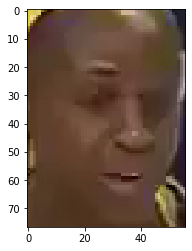

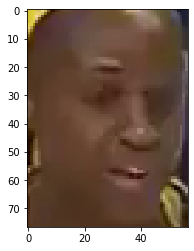

Frames: 1->2; Pair number: 2


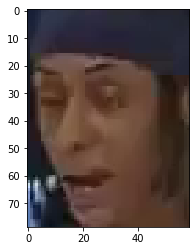

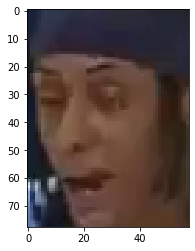

Frames: 2->3; Pair number: 1


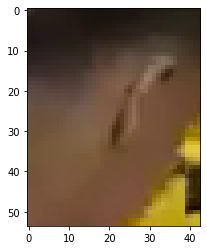

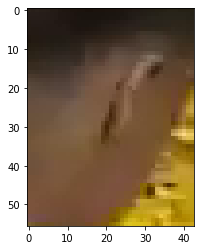

Frames: 2->3; Pair number: 2


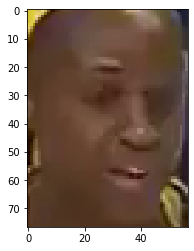

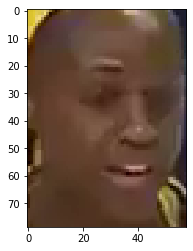

Frames: 2->3; Pair number: 3


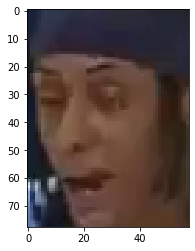

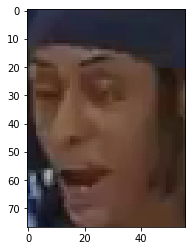

Frames: 3->4; Pair number: 1


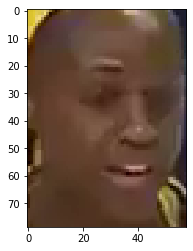

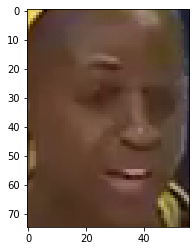

Frames: 3->4; Pair number: 2


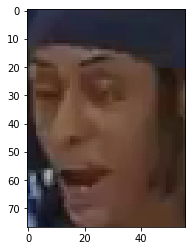

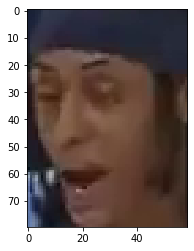

Frames: 3->4; Pair number: 3


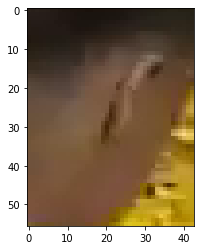

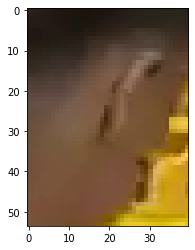

Frames: 4->5; Pair number: 1


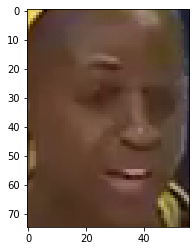

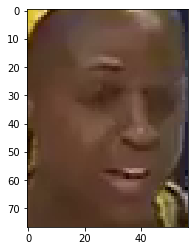

Frames: 4->5; Pair number: 2


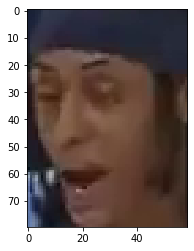

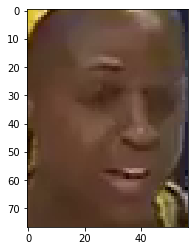

Frames: 4->5; Pair number: 3


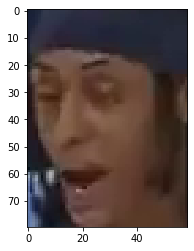

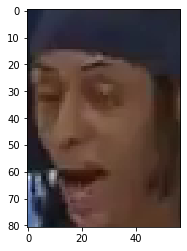

Frames: 4->5; Pair number: 4


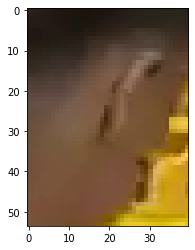

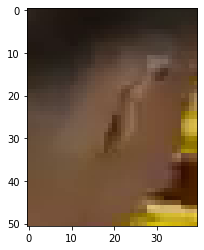

Frames: 5->6; Pair number: 1


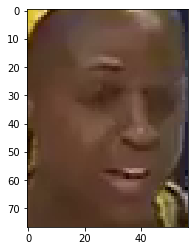

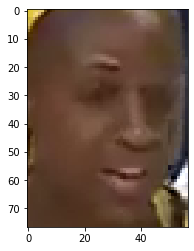

Frames: 5->6; Pair number: 2


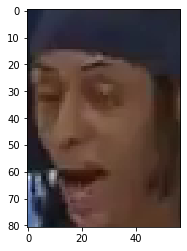

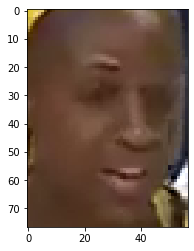

Frames: 5->6; Pair number: 3


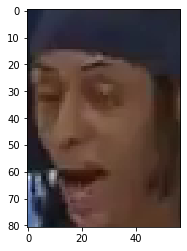

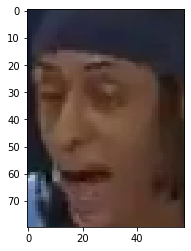

Frames: 6->7; Pair number: 1


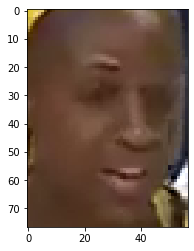

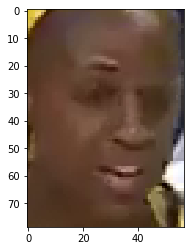

Frames: 6->7; Pair number: 2


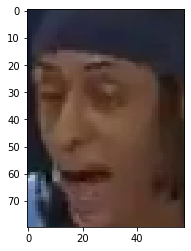

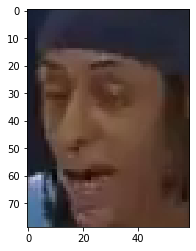

Frames: 7->8; Pair number: 1


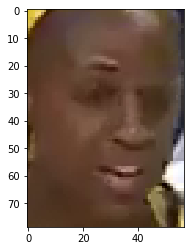

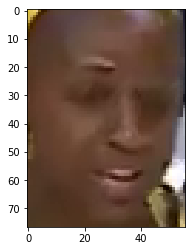

Frames: 7->8; Pair number: 2


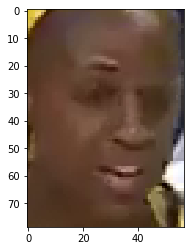

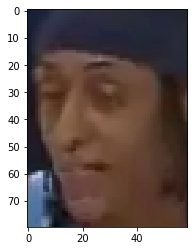

Frames: 7->8; Pair number: 3


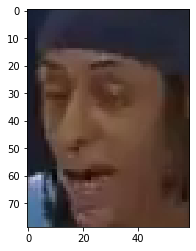

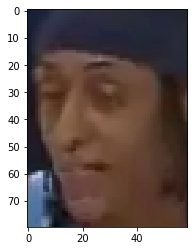

Frames: 8->9; Pair number: 1


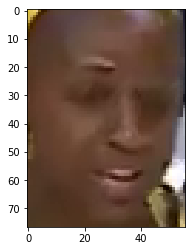

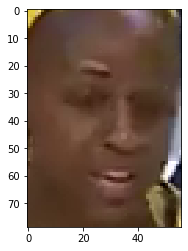

Frames: 8->9; Pair number: 2


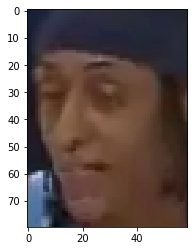

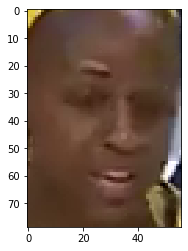

Frames: 8->9; Pair number: 3


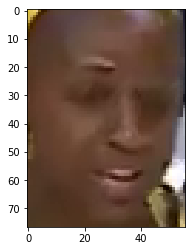

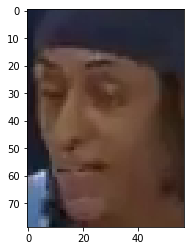

Frames: 8->9; Pair number: 4


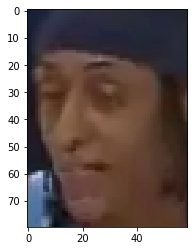

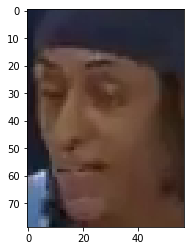

Frames: 9->10; Pair number: 1


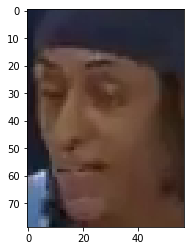

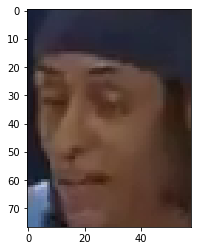

Frames: 9->10; Pair number: 2


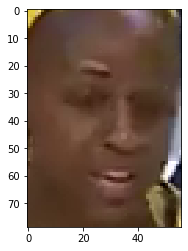

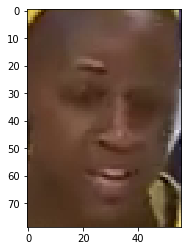

Frames: 9->10; Pair number: 3


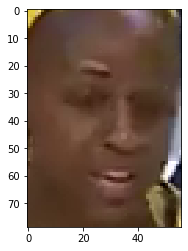

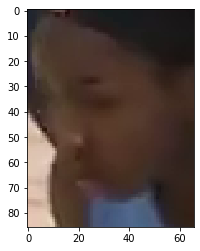

Frames: 9->10; Pair number: 4


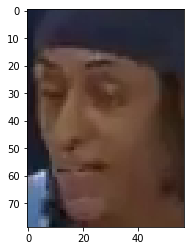

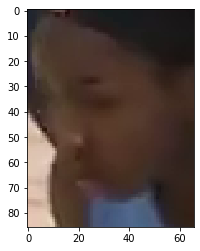

Frames: 10->11; Pair number: 1


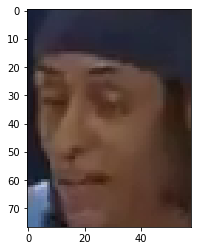

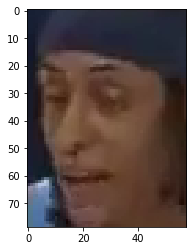

Frames: 10->11; Pair number: 2


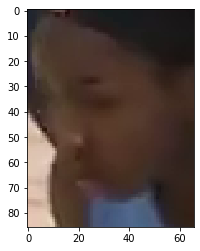

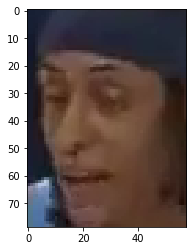

Frames: 10->11; Pair number: 3


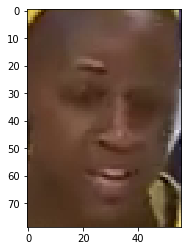

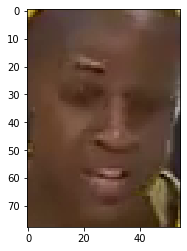

Frames: 10->11; Pair number: 4


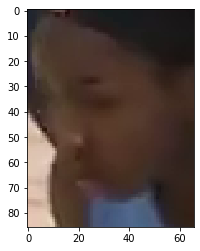

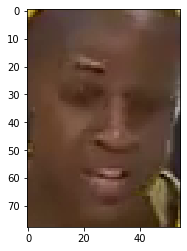

Frames: 11->12; Pair number: 1


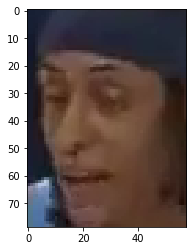

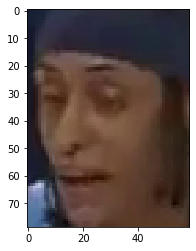

Frames: 11->12; Pair number: 2


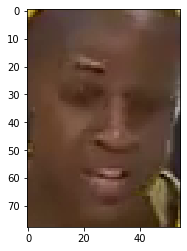

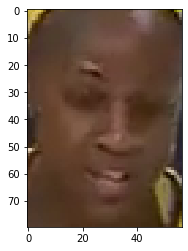

Frames: 12->13; Pair number: 1


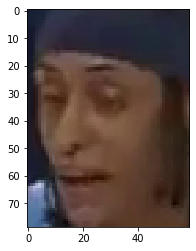

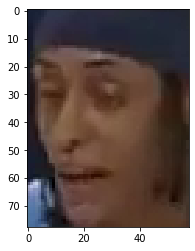

Frames: 12->13; Pair number: 2


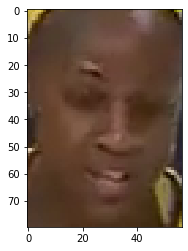

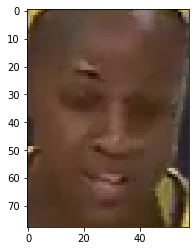

Frames: 12->13; Pair number: 3


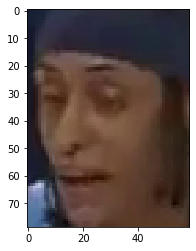

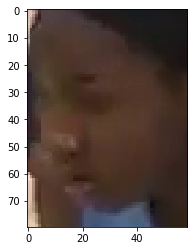

Frames: 12->13; Pair number: 4


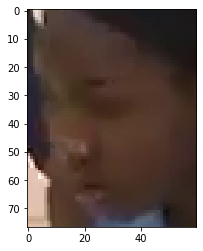

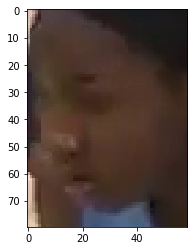

Frames: 12->13; Pair number: 5


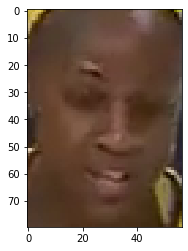

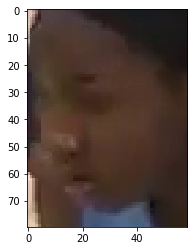

Frames: 13->14; Pair number: 1


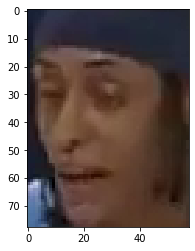

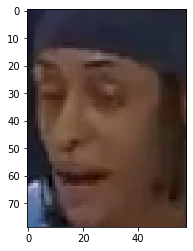

Frames: 13->14; Pair number: 2


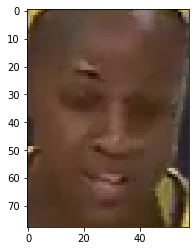

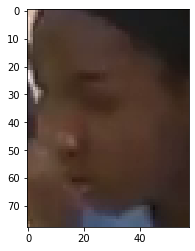

Frames: 13->14; Pair number: 3


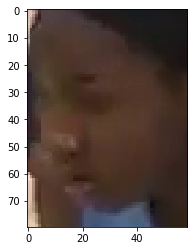

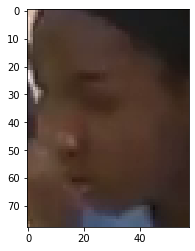

Frames: 13->14; Pair number: 4


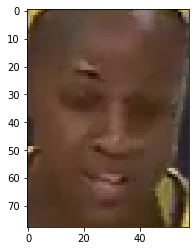

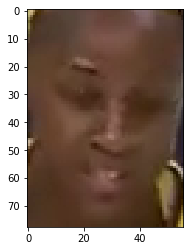

Frames: 13->14; Pair number: 5


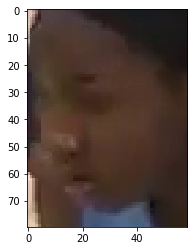

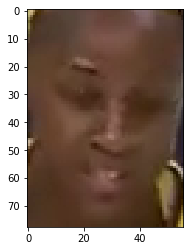

Frames: 14->15; Pair number: 1


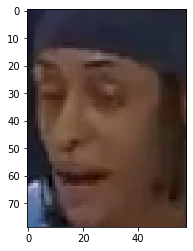

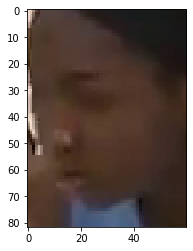

Frames: 14->15; Pair number: 2


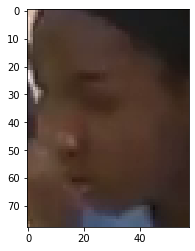

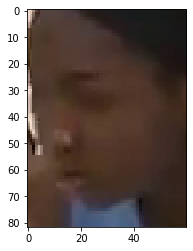

Frames: 14->15; Pair number: 3


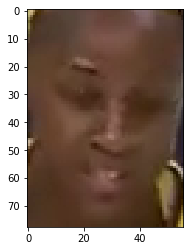

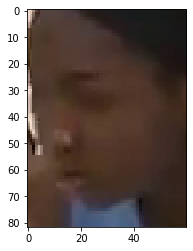

Frames: 14->15; Pair number: 4


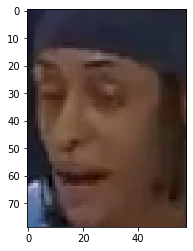

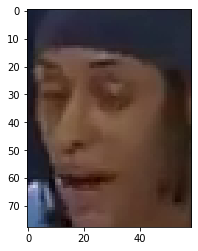

Frames: 14->15; Pair number: 5


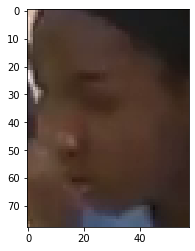

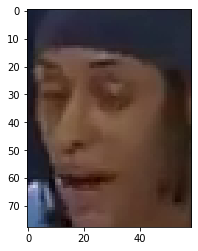

Frames: 14->15; Pair number: 6


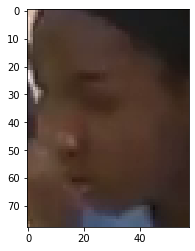

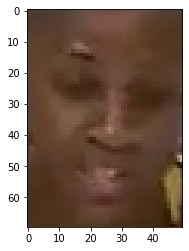

Frames: 14->15; Pair number: 7


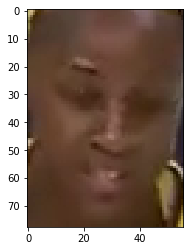

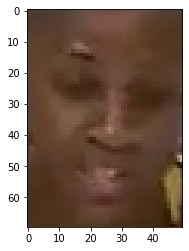

Frames: 15->16; Pair number: 1


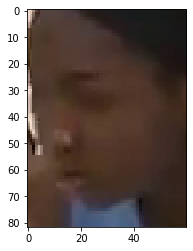

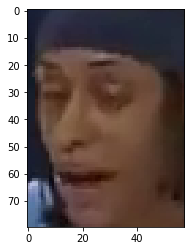

Frames: 15->16; Pair number: 2


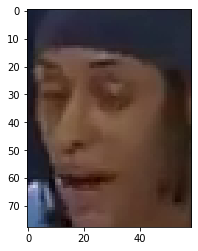

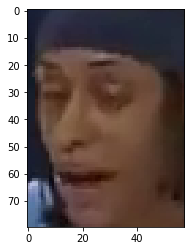

Frames: 15->16; Pair number: 3


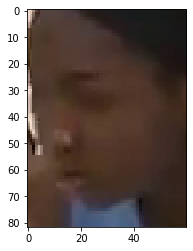

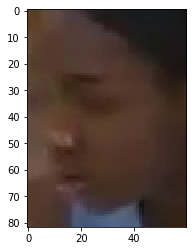

Frames: 15->16; Pair number: 4


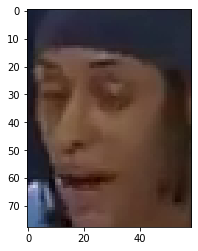

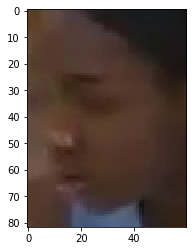

Frames: 15->16; Pair number: 5


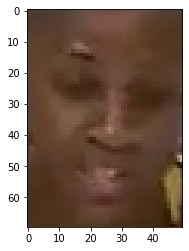

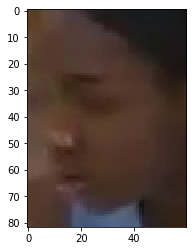

Frames: 15->16; Pair number: 6


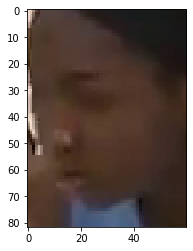

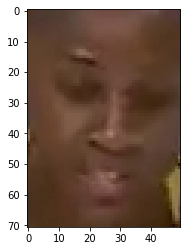

Frames: 15->16; Pair number: 7


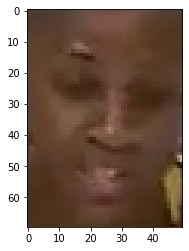

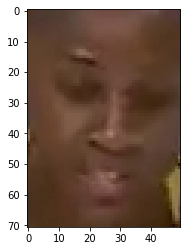

Frames: 15->16; Pair number: 8


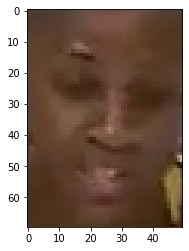

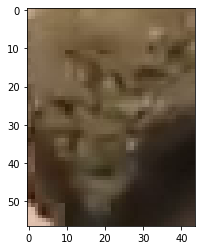

Frames: 16->17; Pair number: 1


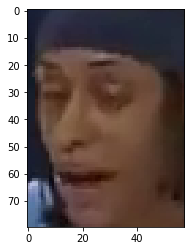

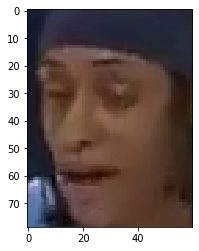

Frames: 16->17; Pair number: 2


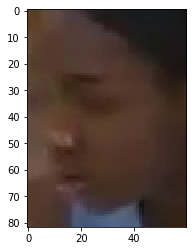

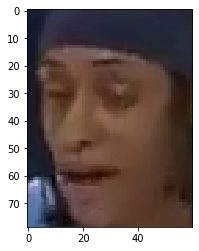

Frames: 16->17; Pair number: 3


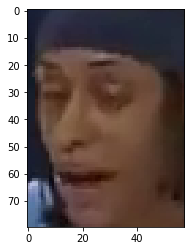

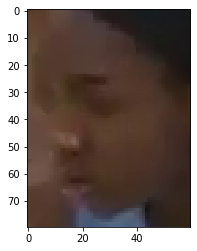

Frames: 16->17; Pair number: 4


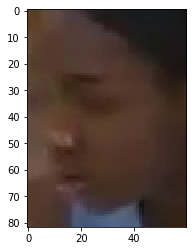

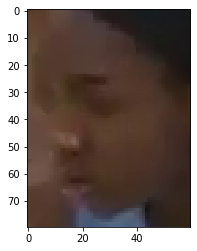

Frames: 16->17; Pair number: 5


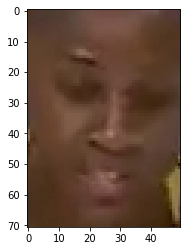

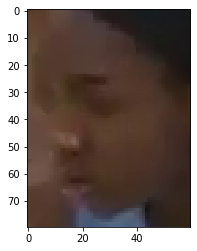

Frames: 16->17; Pair number: 6


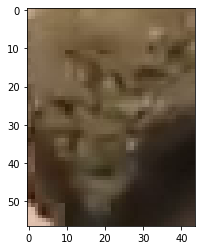

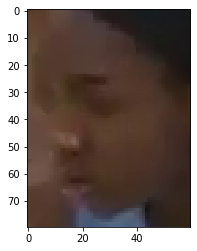

Frames: 16->17; Pair number: 7


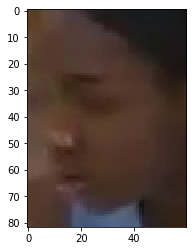

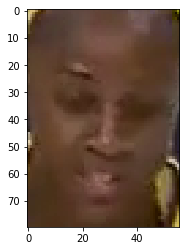

Frames: 16->17; Pair number: 8


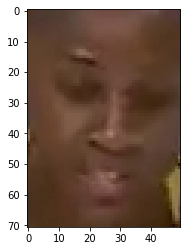

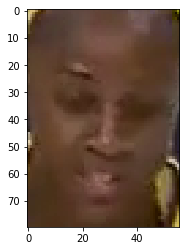

Frames: 16->17; Pair number: 9


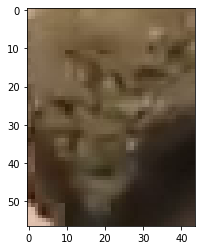

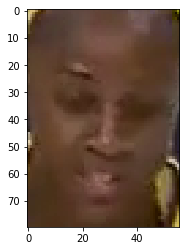

Frames: 16->17; Pair number: 10


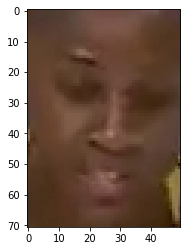

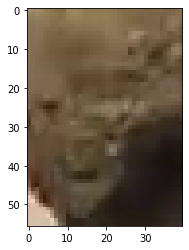

Frames: 16->17; Pair number: 11


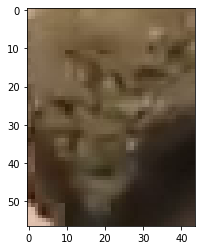

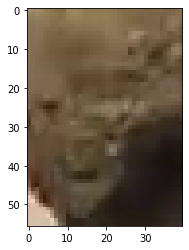

Frames: 16->17; Pair number: 12


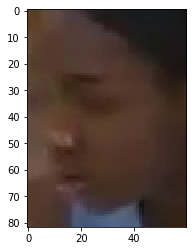

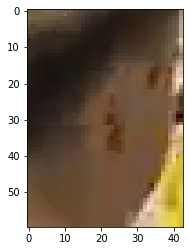

Frames: 16->17; Pair number: 13


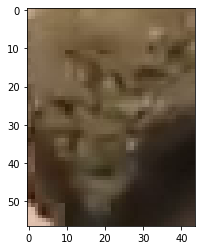

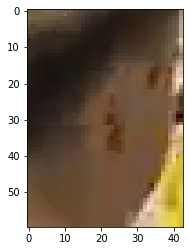

Frames: 17->18; Pair number: 1


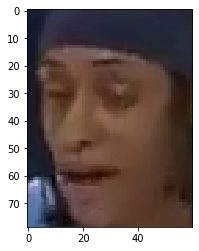

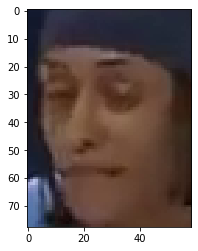

Frames: 17->18; Pair number: 2


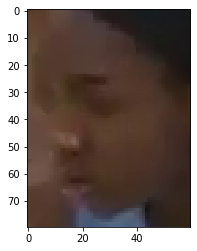

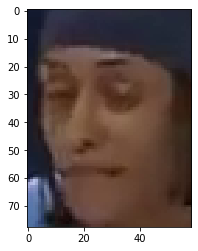

Frames: 17->18; Pair number: 3


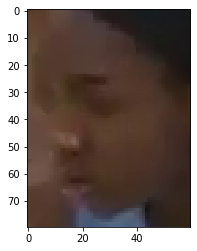

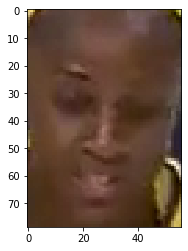

Frames: 17->18; Pair number: 4


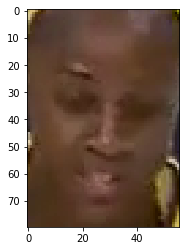

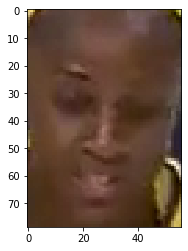

Frames: 17->18; Pair number: 5


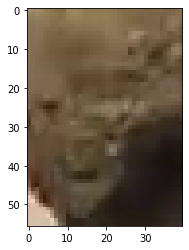

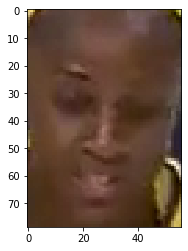

Frames: 17->18; Pair number: 6


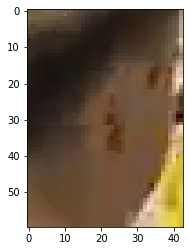

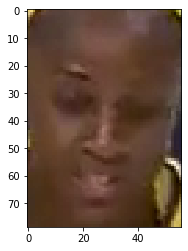

Frames: 17->18; Pair number: 7


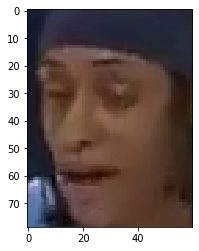

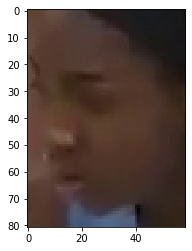

Frames: 17->18; Pair number: 8


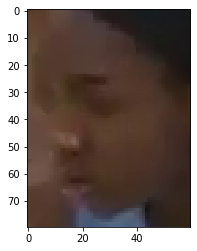

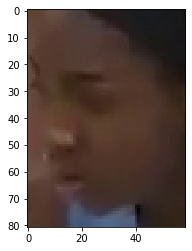

Frames: 17->18; Pair number: 9


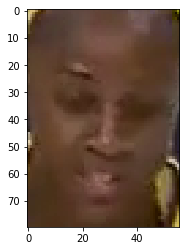

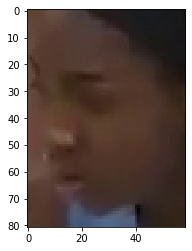

Frames: 17->18; Pair number: 10


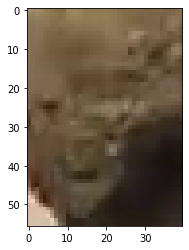

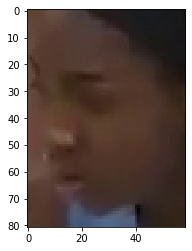

Frames: 17->18; Pair number: 11


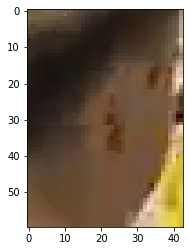

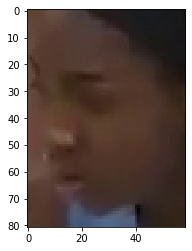

Frames: 18->19; Pair number: 1


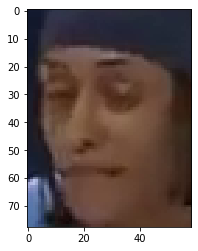

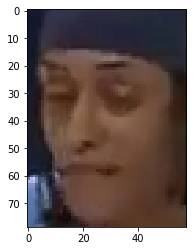

Frames: 18->19; Pair number: 2


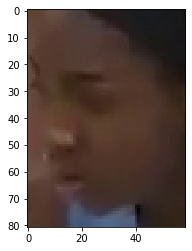

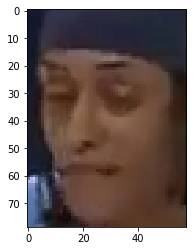

Frames: 18->19; Pair number: 3


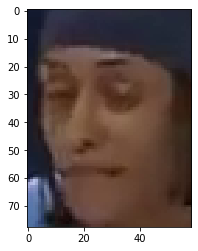

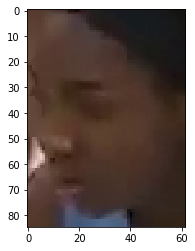

Frames: 18->19; Pair number: 4


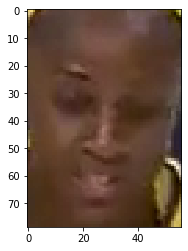

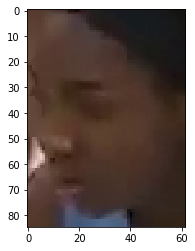

Frames: 18->19; Pair number: 5


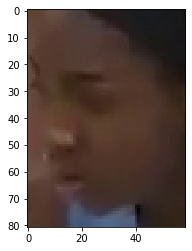

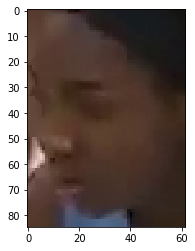

Frames: 18->19; Pair number: 6


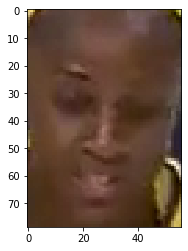

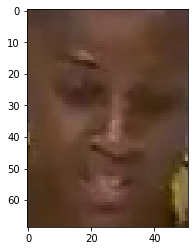

Frames: 18->19; Pair number: 7


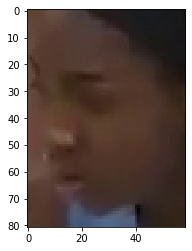

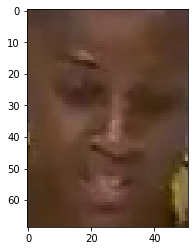

Frames: 19->20; Pair number: 1


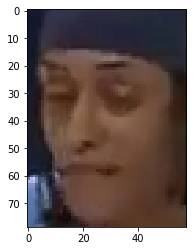

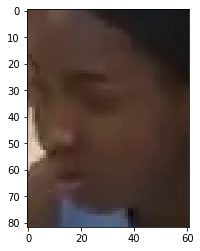

Frames: 19->20; Pair number: 2


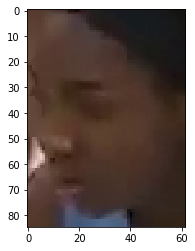

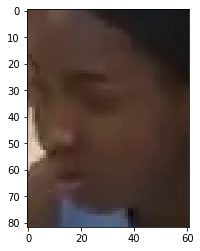

Frames: 19->20; Pair number: 3


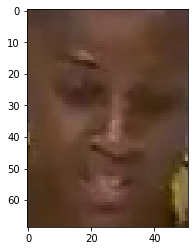

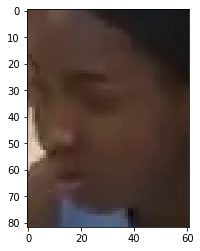

Frames: 19->20; Pair number: 4


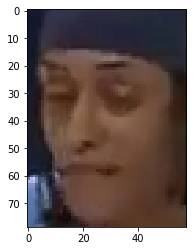

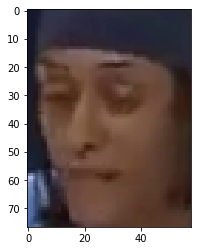

Frames: 19->20; Pair number: 5


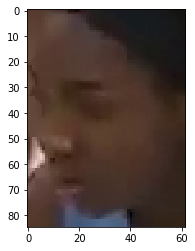

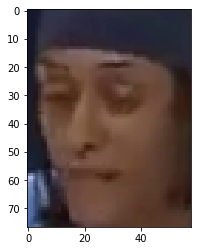

Frames: 19->20; Pair number: 6


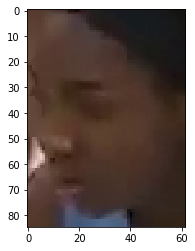

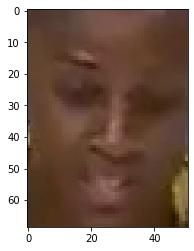

Frames: 19->20; Pair number: 7


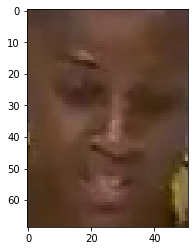

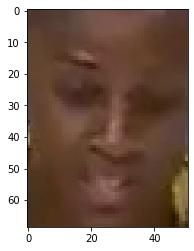

Frames: 20->21; Pair number: 1


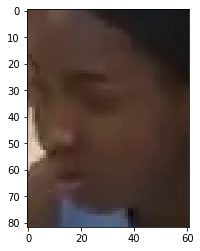

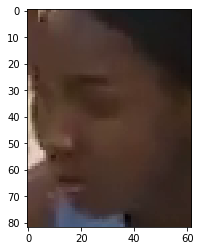

Frames: 20->21; Pair number: 2


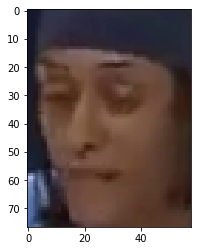

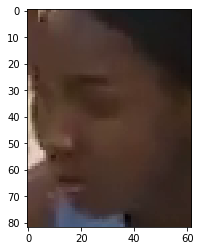

Frames: 20->21; Pair number: 3


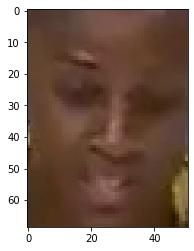

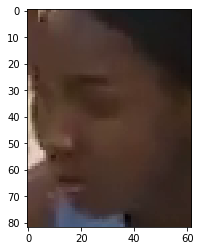

Frames: 20->21; Pair number: 4


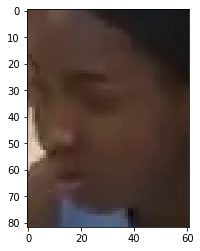

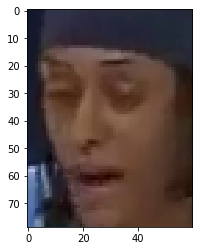

Frames: 20->21; Pair number: 5


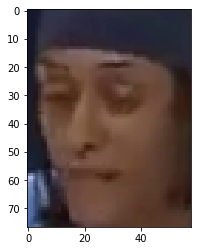

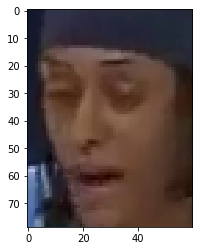

Frames: 20->21; Pair number: 6


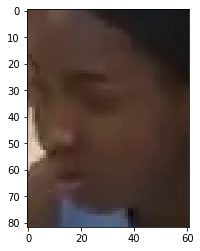

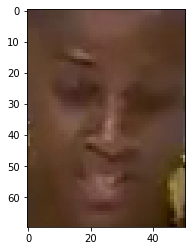

Frames: 20->21; Pair number: 7


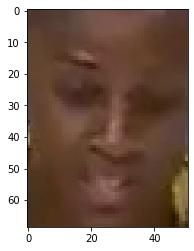

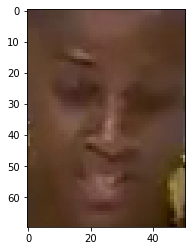

Frames: 21->22; Pair number: 1


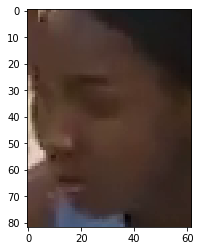

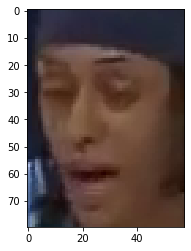

Frames: 21->22; Pair number: 2


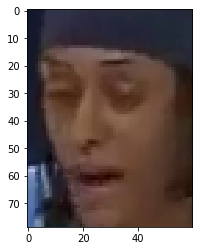

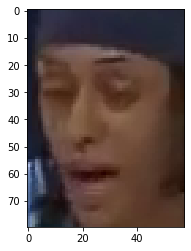

Frames: 21->22; Pair number: 3


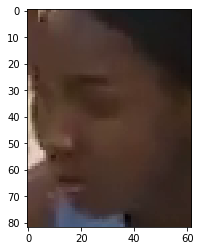

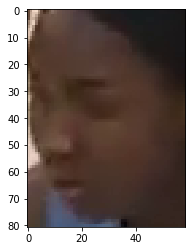

Frames: 21->22; Pair number: 4


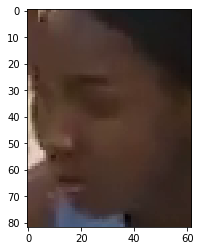

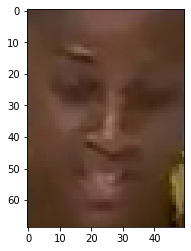

Frames: 21->22; Pair number: 5


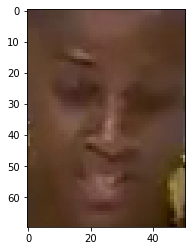

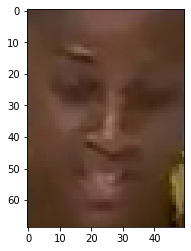

Frames: 22->23; Pair number: 1


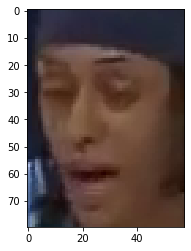

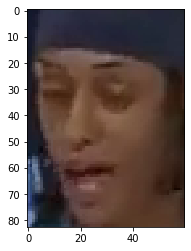

Frames: 22->23; Pair number: 2


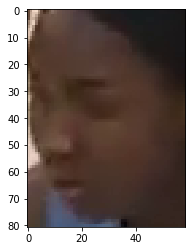

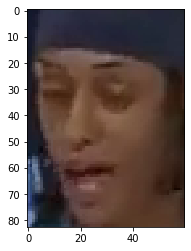

Frames: 22->23; Pair number: 3


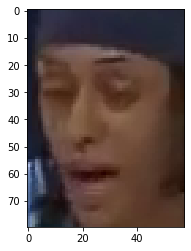

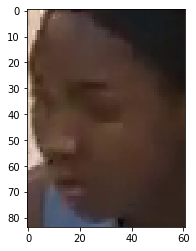

Frames: 22->23; Pair number: 4


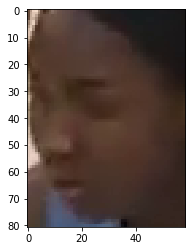

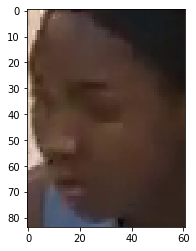

Frames: 22->23; Pair number: 5


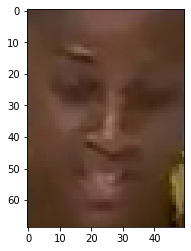

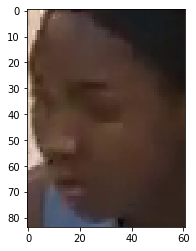

Frames: 22->23; Pair number: 6


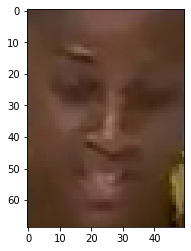

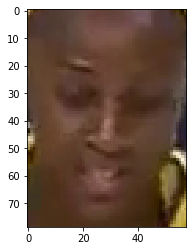

Frames: 22->23; Pair number: 7


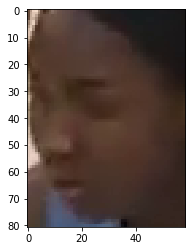

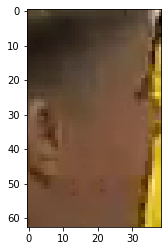

Frames: 23->24; Pair number: 1


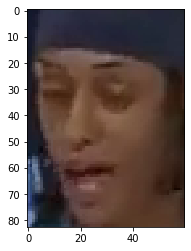

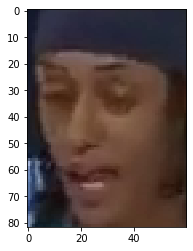

Frames: 23->24; Pair number: 2


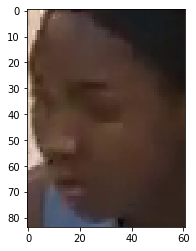

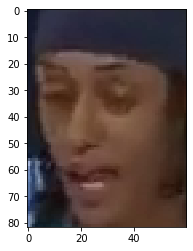

Frames: 23->24; Pair number: 3


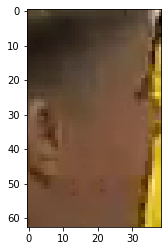

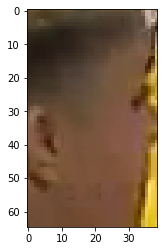

Frames: 23->24; Pair number: 4


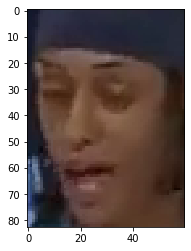

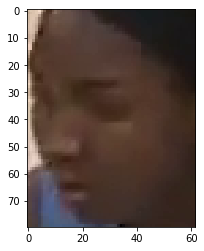

Frames: 23->24; Pair number: 5


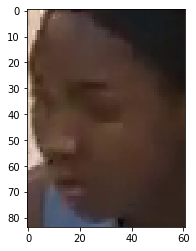

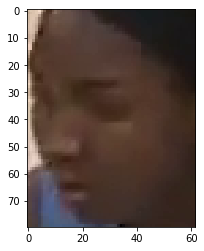

Frames: 23->24; Pair number: 6


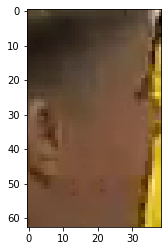

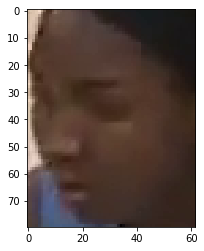

Frames: 23->24; Pair number: 7


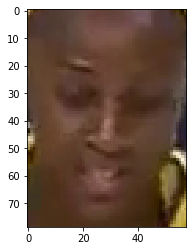

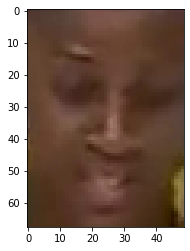

Frames: 24->25; Pair number: 1


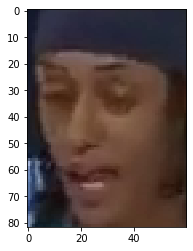

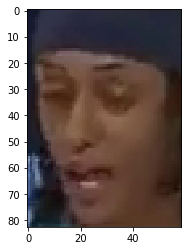

Frames: 24->25; Pair number: 2


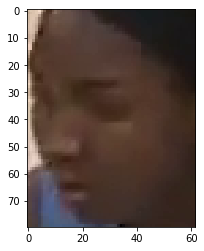

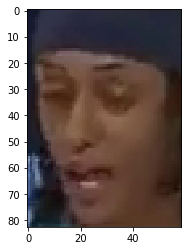

Frames: 24->25; Pair number: 3


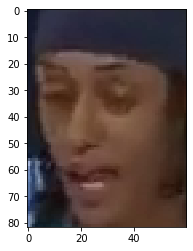

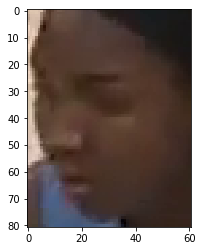

Frames: 24->25; Pair number: 4


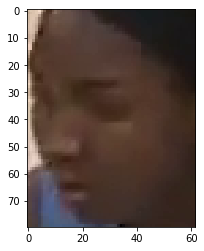

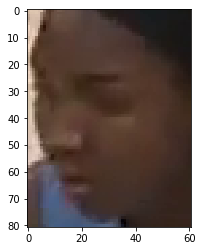

Frames: 24->25; Pair number: 5


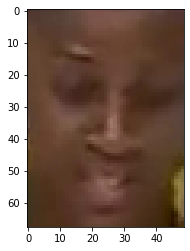

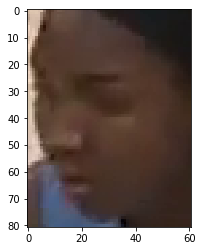

Frames: 24->25; Pair number: 6


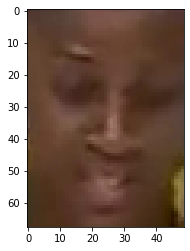

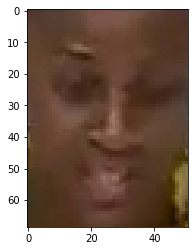

Frames: 24->25; Pair number: 7


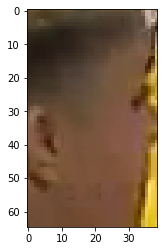

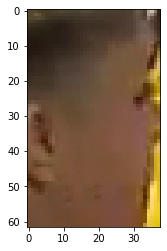

Frames: 24->25; Pair number: 8


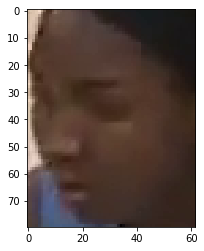

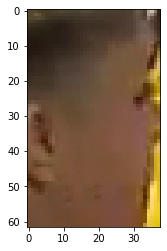

Frames: 25->26; Pair number: 1


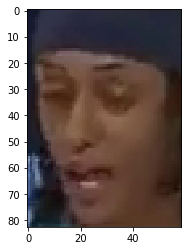

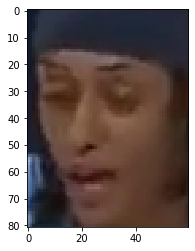

Frames: 25->26; Pair number: 2


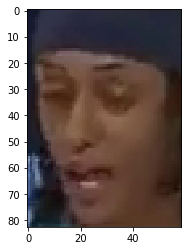

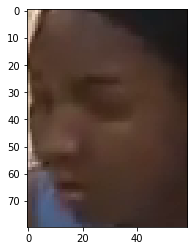

Frames: 25->26; Pair number: 3


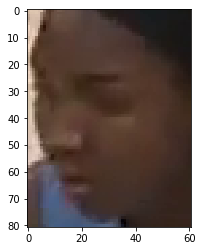

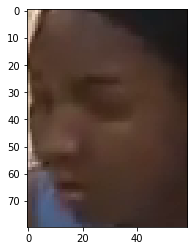

Frames: 25->26; Pair number: 4


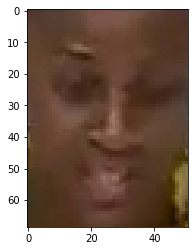

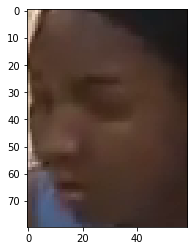

Frames: 25->26; Pair number: 5


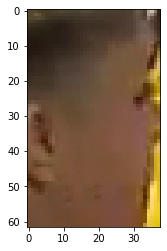

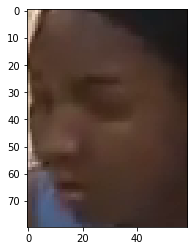

Frames: 25->26; Pair number: 6


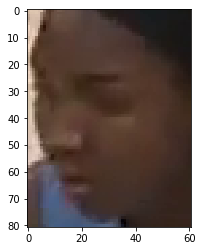

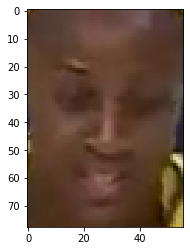

Frames: 25->26; Pair number: 7


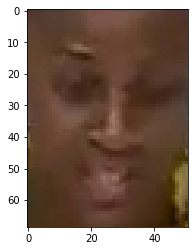

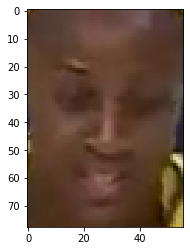

Frames: 26->27; Pair number: 1


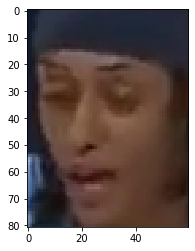

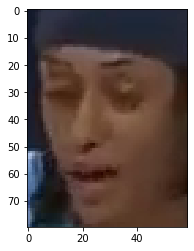

Frames: 26->27; Pair number: 2


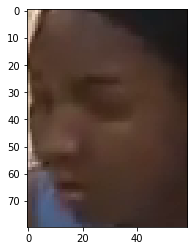

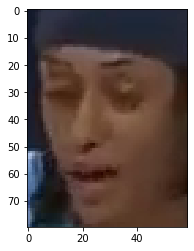

Frames: 26->27; Pair number: 3


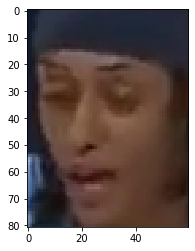

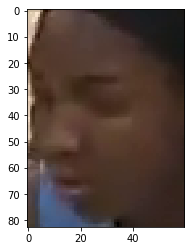

Frames: 26->27; Pair number: 4


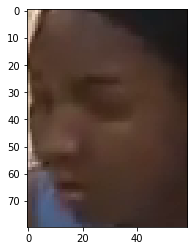

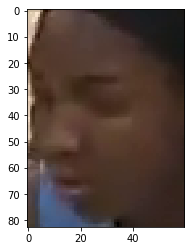

Frames: 26->27; Pair number: 5


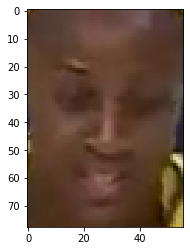

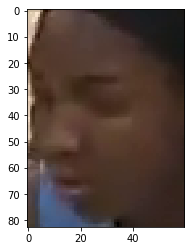

Frames: 26->27; Pair number: 6


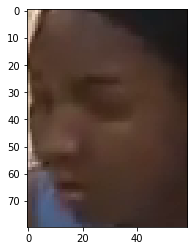

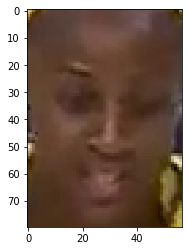

Frames: 26->27; Pair number: 7


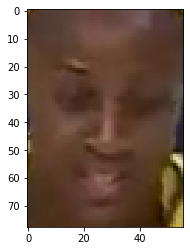

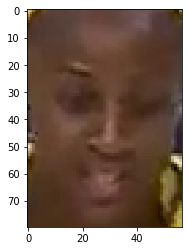

Frames: 27->28; Pair number: 1


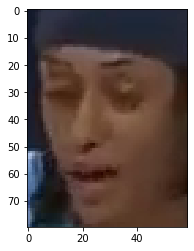

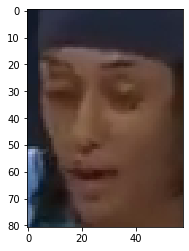

Frames: 27->28; Pair number: 2


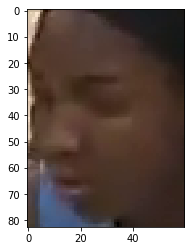

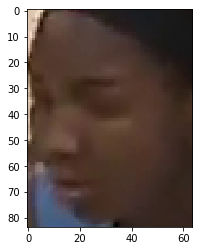

Frames: 27->28; Pair number: 3


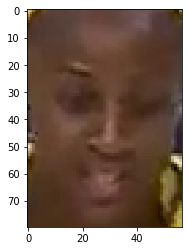

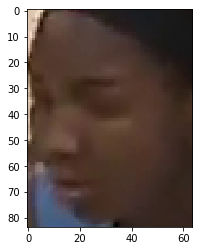

Frames: 27->28; Pair number: 4


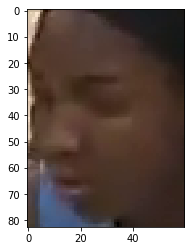

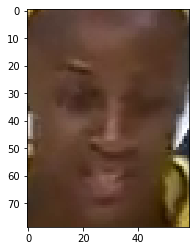

Frames: 27->28; Pair number: 5


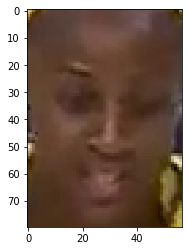

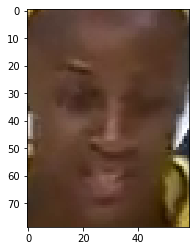

Frames: 28->29; Pair number: 1


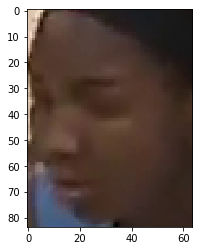

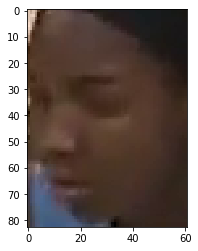

Frames: 28->29; Pair number: 2


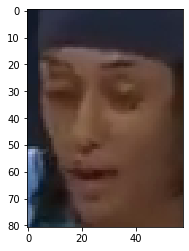

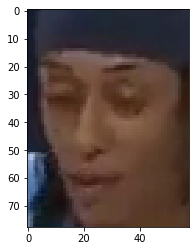

Frames: 28->29; Pair number: 3


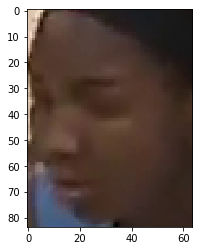

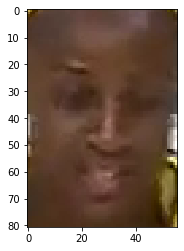

Frames: 28->29; Pair number: 4


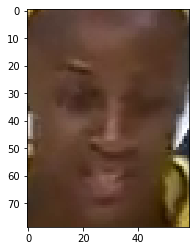

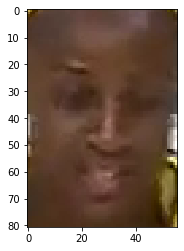

Frames: 29->30; Pair number: 1


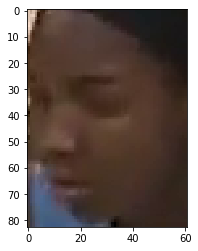

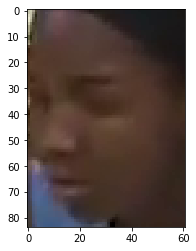

Frames: 29->30; Pair number: 2


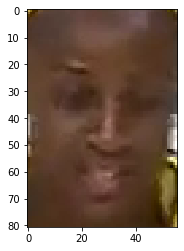

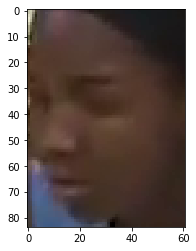

Frames: 29->30; Pair number: 3


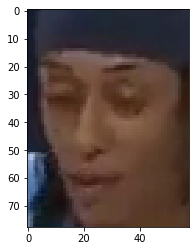

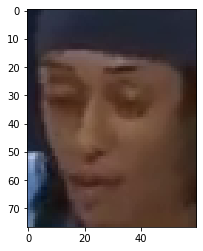

Frames: 29->30; Pair number: 4


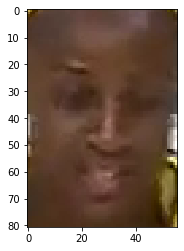

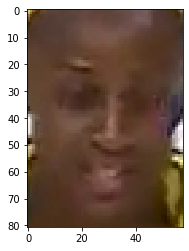

Frames: 29->30; Pair number: 5


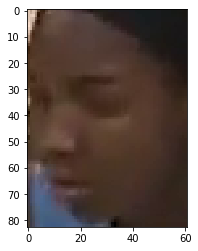

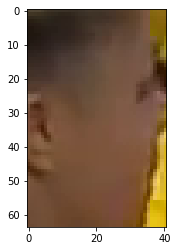

Frames: 29->30; Pair number: 6


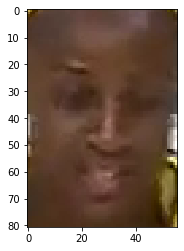

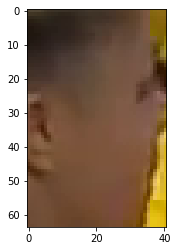

Frames: 30->31; Pair number: 1


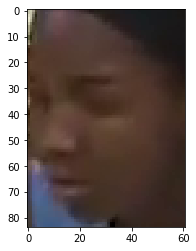

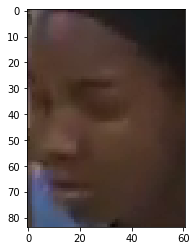

Frames: 30->31; Pair number: 2


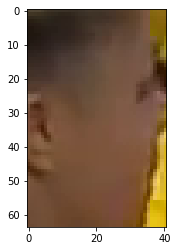

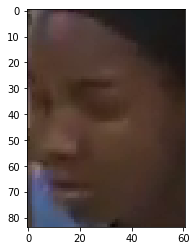

Frames: 30->31; Pair number: 3


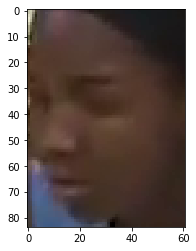

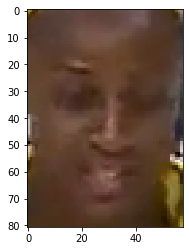

Frames: 30->31; Pair number: 4


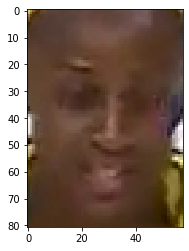

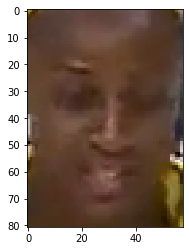

Frames: 30->31; Pair number: 5


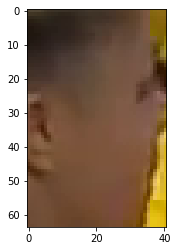

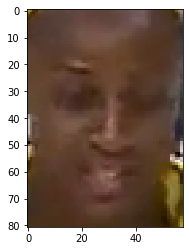

Frames: 30->31; Pair number: 6


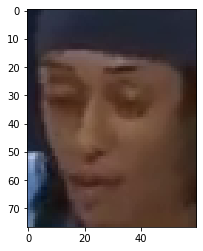

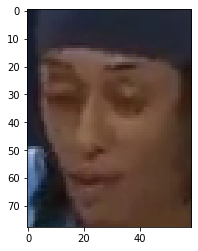

Frames: 30->31; Pair number: 7


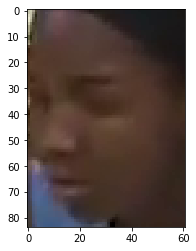

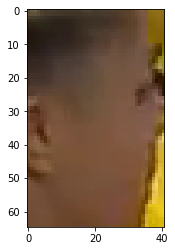

Frames: 30->31; Pair number: 8


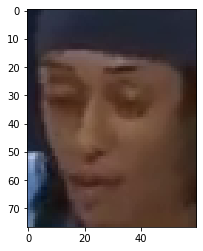

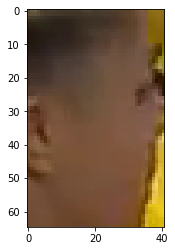

Frames: 30->31; Pair number: 9


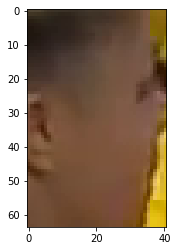

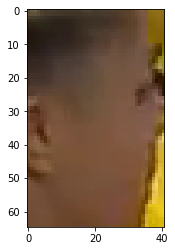

Frames: 31->32; Pair number: 1


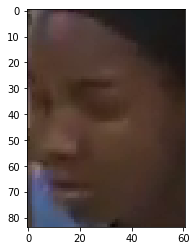

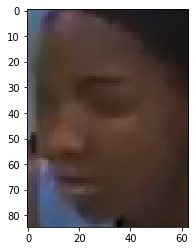

Frames: 31->32; Pair number: 2


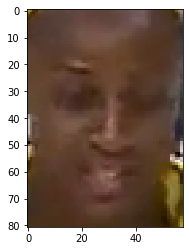

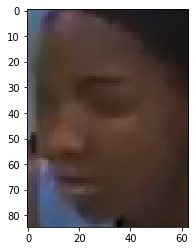

Frames: 31->32; Pair number: 3


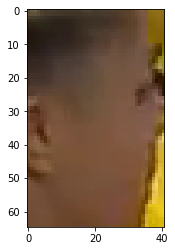

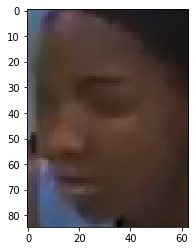

Frames: 31->32; Pair number: 4


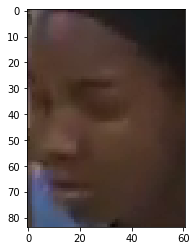

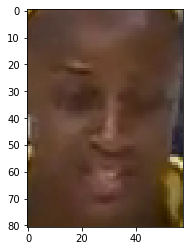

Frames: 31->32; Pair number: 5


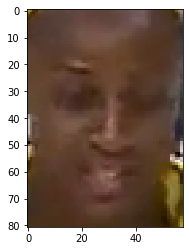

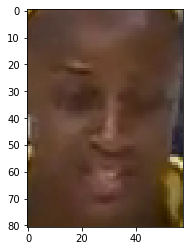

Frames: 31->32; Pair number: 6


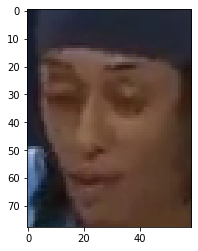

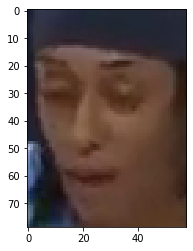

Frames: 31->32; Pair number: 7


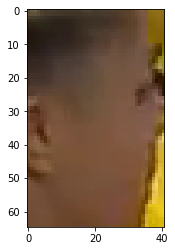

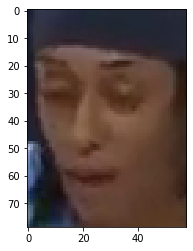

Frames: 32->33; Pair number: 1


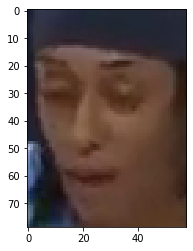

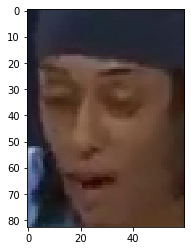

Frames: 32->33; Pair number: 2


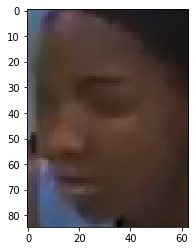

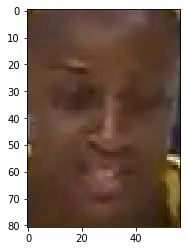

Frames: 32->33; Pair number: 3


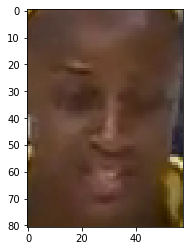

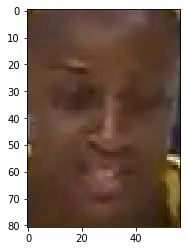

Frames: 32->33; Pair number: 4


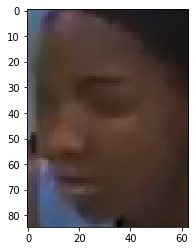

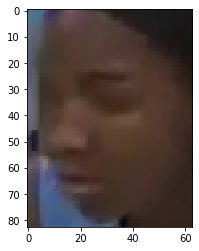

Frames: 32->33; Pair number: 5


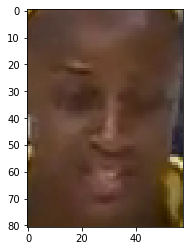

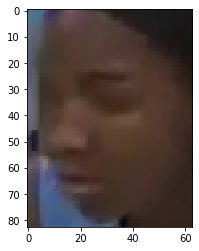

Frames: 32->33; Pair number: 6


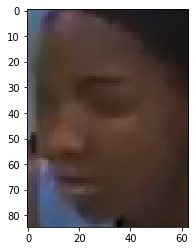

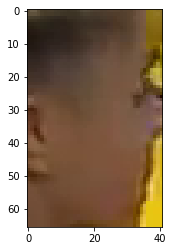

Frames: 32->33; Pair number: 7


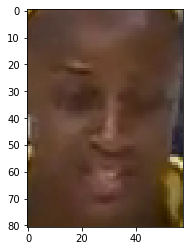

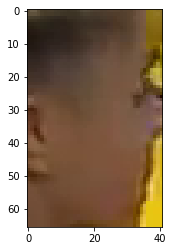

Frames: 32->33; Pair number: 8


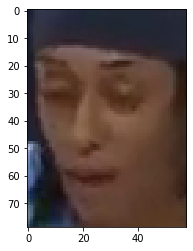

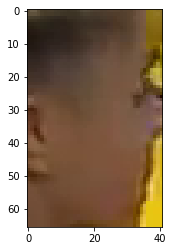

In [34]:
frame_number = 0
for current_faces_pair in faces_pair:
    
    frame_number += 1
    
    pair_number = 0
    for face_pair in current_faces_pair:
            pair_number += 1
            
            print("Frames: {0}->{1}; Pair number: {2}".format(frame_number, frame_number + 1,
                                                             pair_number))
            face_1 = face_pair[0]
            face_2 = face_pair[1]
            
            plt.figure()
            plt.imshow(face_1)
            plt.figure()
            plt.imshow(face_2)
            
            plt.show()